### 3.4.1 Identifying Redundant Information

This section deals with identifying the relationships between variables to find redundant information. In marketing analytics, identifying redundancy is crucial as it helps us streamline features in the dataset for more stable and interpretable models. Covariance and correlation are central to this. Let's explore the covariance and correlation between two variables in our dataset.

#### Covariance and Correlation Formulas:

1. **Covariance Formula**:  
   The covariance between two variables $X$ and $Y$ is given by:

   $$ \text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$

   This measures how two variables change together.

2. **Correlation Formula**:  
   The correlation coefficient standardizes the covariance by the product of the standard deviations of $X$ and $Y$:

   $$ \rho_{XY} = \frac{\text{Cov}(X, Y)}{s_X s_Y} $$

   This transforms the covariance into a dimensionless value between -1 and 1, making it comparable across variables.

In [1]:
# Required Libraries
import numpy as np
import pandas as pd

# Simulate some sample data (for illustration purposes)
np.random.seed(42)

# Create a dataset with 2 related features (interest_rate and conversion_rate)
n = 500  # Sample size
interest_rate = np.random.uniform(0.5, 5.0, n)  # Simulating interest rate between 0.5% and 5%
conversion_rate = 0.5 * interest_rate + np.random.normal(0, 0.1, n)  # Linear relation with some noise

# Create DataFrame
data = pd.DataFrame({
    'interest_rate': interest_rate,
    'conversion_rate': conversion_rate
})

# 1. Covariance calculation
covariance = np.cov(data['interest_rate'], data['conversion_rate'])[0][1]

# 2. Pearson Correlation
correlation_coefficient = np.corrcoef(data['interest_rate'], data['conversion_rate'])[0][1]

covariance, correlation_coefficient

(np.float64(0.9125334126635751), np.float64(0.9892264656487867))

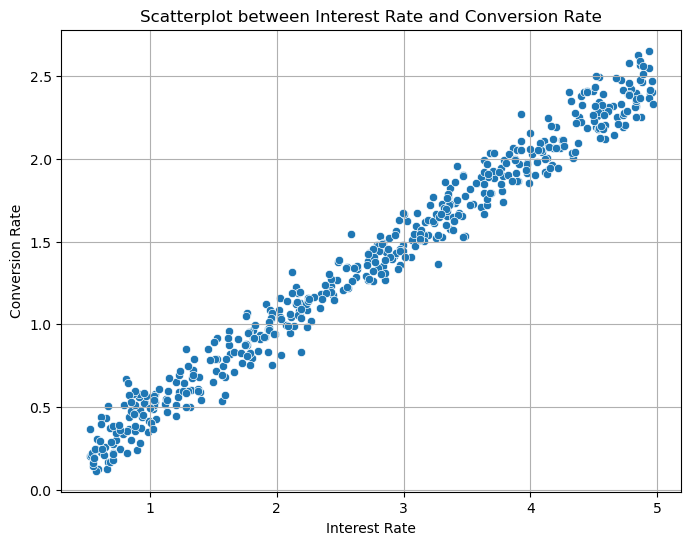

In [2]:
# Visualizing the relationship between interest_rate and conversion_rate
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='interest_rate', y='conversion_rate', data=data)
plt.title('Scatterplot between Interest Rate and Conversion Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()

### 3.4.2 Interaction Effects

In multivariate exploration, understanding interaction effects is essential. An interaction occurs when the effect of one variable depends on the level of another variable. For instance, in a marketing campaign, the effect of the contact channel (email vs. phone) on conversion rates may differ based on age.

The basic form of an interaction term in a regression model is:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 (X_1 \times X_2) + \varepsilon $$

Where:
- $Y$ is the outcome (e.g., conversion rate),
- $X_1$ and $X_2$ are the independent variables (e.g., contact method and age),
- $\beta_3$ is the coefficient of the interaction term ($X_1 \times X_2$), which measures how the effect of $X_1$ changes with $X_2$.

If $\beta_3 > 0$, this means the two variables have a reinforcing effect. If $\beta_3 < 0$, one variable diminishes the effect of the other.

The goal of detecting interactions is to identify conditional behavior—how the relationship between variables changes depending on other factors.

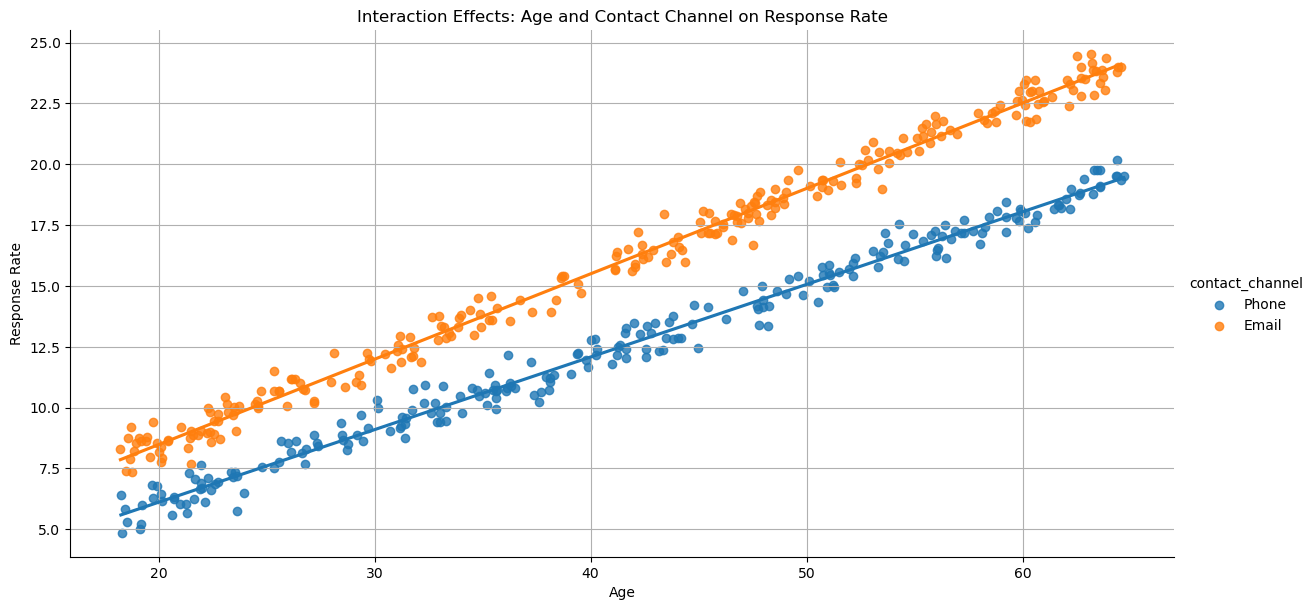

In [3]:
# Required Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Simulate some data
np.random.seed(42)

# Create variables for the simulation
n = 500  # Sample size
age = np.random.uniform(18, 65, n)  # Age between 18 and 65
contact_channel = np.random.choice(['Email', 'Phone'], n)  # Contact method (Email or Phone)
contact_channel_numeric = np.where(contact_channel == 'Email', 1, 0)  # Encoding Contact Method

# Interaction between Age and Contact Method
# Assume that older customers respond better to emails (for example).
response_rate = 0.3 * age + 1.5 * contact_channel_numeric + 0.05 * age * contact_channel_numeric + np.random.normal(0, 0.5, n)

# Create DataFrame
data = pd.DataFrame({
    'age': age,
    'contact_channel': contact_channel,
    'response_rate': response_rate
})

# Create interaction term
data['age_channel_interaction'] = data['age'] * data['contact_channel'].map({'Email': 1, 'Phone': 0})

# Fit a linear regression model to visualize the interaction
sns.lmplot(x='age', y='response_rate', hue='contact_channel', data=data, aspect=2, height=6, ci=None)

# Set plot labels and title
plt.title('Interaction Effects: Age and Contact Channel on Response Rate')
plt.xlabel('Age')
plt.ylabel('Response Rate')
plt.grid(True)
plt.show()

### 3.4.3 Feature Importance and Selection

In any data-driven campaign analysis, not all variables contribute equally to prediction. Some variables add valuable information, while others might add noise or duplicate the information already captured by other features. Feature selection is the process of identifying the most impactful variables for your model, which can improve accuracy, stability, and interpretability.

The process of feature importance quantifies how much each predictor contributes to the predictive power of a model. In tree-based models like decision trees or random forests, feature importance is based on how much each variable reduces the classification error when used to split the data.

A popular method for feature importance is based on how well a feature splits the data (i.e., reduces impurity). More important features are those that contribute to reducing error more effectively.

In campaign analytics, interpreting feature importance can guide strategy. For example, if `contact_month`, `age`, and `number_of_contacts` emerge as the dominant features, analysts know where to focus their marketing resources.

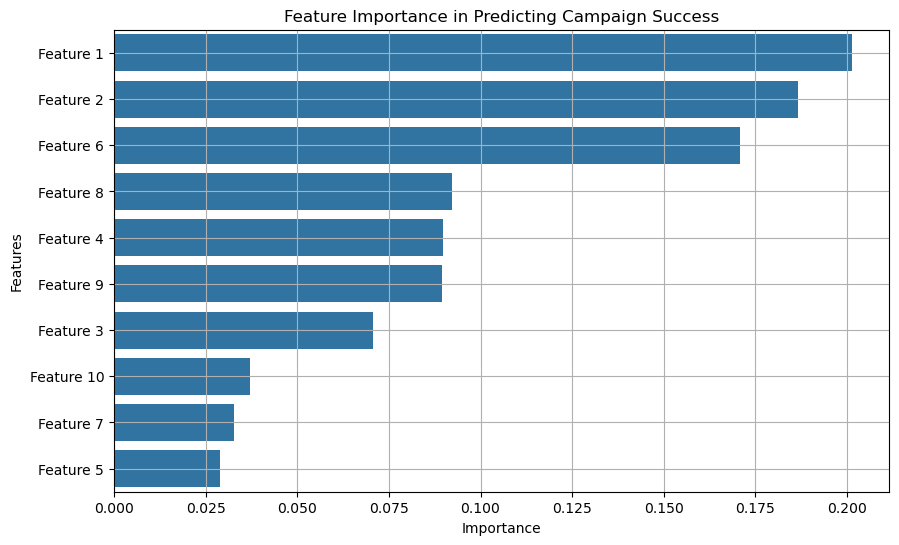

In [4]:
# Required Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating some campaign-related data
np.random.seed(42)

# Create a synthetic dataset with 10 features
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Campaign Success')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

### 3.5 Transition to Modeling

Once the exploratory data analysis (EDA) process is complete and patterns in the data are understood, it's time to transition into the modeling phase. The purpose of this transition is to prepare the dataset for building predictive models. Below are the necessary steps:

1. **Clean Features:** Ensure there are no missing, inconsistent, or irrelevant variables in the dataset. 
2. **Independent Information:** Make sure that the information fed into the model is independent. We've already assessed correlations and interaction effects during EDA.
3. **Define Outcome:** Clearly define the target variable (e.g., `subscription = yes/no` for a marketing campaign).

Once these are verified, we move on to encoding and scaling:
- **Encoding**: Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
- **Scaling**: For numeric variables, standardization (scaling to zero mean and unit variance) is often necessary for models sensitive to feature scale, like logistic regression.

Now, let’s walk through how to do this using a marketing dataset.

In [5]:
# Required Libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Simulate some campaign-related data
np.random.seed(42)

# Create a synthetic dataset
n = 500  # Sample size
age = np.random.randint(18, 70, n)  # Age between 18 and 70
contact_method = np.random.choice(['Email', 'Phone'], n)  # Contact method (Email or Phone)
subscription = np.random.choice([0, 1], n)  # Binary target: 0 = No, 1 = Yes

# Create DataFrame
data = pd.DataFrame({
    'age': age,
    'contact_method': contact_method,
    'subscription': subscription
})

# Define feature columns and target
X = data.drop(columns='subscription')
y = data['subscription']

# 1. Encoding Categorical Features (e.g., contact_method)
# OneHotEncoder will convert categorical 'contact_method' into dummy/indicator variables
categorical_features = ['contact_method']
numeric_features = ['age']

# Create the column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

# 2. Create a pipeline to first preprocess and then fit a model (simple logistic regression here for example)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('classifier', LogisticRegression())  # Uncomment to add classifier
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Print out transformed data for inspection
X_train_processed[:5]

array([[ 1.63478906,  0.        ,  1.        ],
       [-1.73114724,  1.        ,  0.        ],
       [-0.21317597,  0.        ,  1.        ],
       [-0.14717721,  0.        ,  1.        ],
       [ 0.9088028 ,  0.        ,  1.        ]])